<span style="font-size:24px">Logestic Regression</span>

<span style="font-size:20px">Binary Classification</span>

In this section, we will use breast cancer dataset of scikit-learn which is a classic binary classification dataset used for machine learning. This dataset contains multiple features for tumors as well as it's label (either benign or malignant).

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data = load_breast_cancer()

X = data.data
y = data.target #labels (0:malignant,  1:benign)
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


For the sake of visualization, we will only use two features: mean perimeter of tumor and mean smoothness of it.

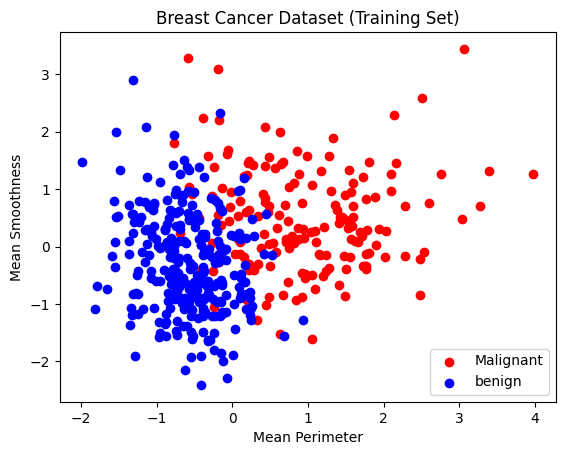

In [3]:
# We will only take two features for visuallization purposes 
X = data.data[:, [2, 4]]  # mean perimeter and mean smoothnes

#Standardizing the features 

scalar = StandardScaler()
X = scalar.fit_transform(X)


# add bias (x_0 = 1) term to X
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

# add bias (x_0 = 1) term to X
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

X_train, X_val, y_train, y_val = train_test_split(
    X_bias, y, test_size=0.2, random_state=42, stratify=y
)


plt.Figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color = "red", label='Malignant')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color = "blue", label='benign')
plt.xlabel('Mean Perimeter')
plt.ylabel('Mean Smoothness')
plt.title('Breast Cancer Dataset (Training Set)')
plt.legend()
plt.show()

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(w, X, y):
    z = X @ w
    # applying the sigmoid function to get predicted probabilities
    predictions = sigmoid(z)
    # binary cross-entropy loss
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

def compute_gradient(w, X, y):
    z = X @ w
    predictions = sigmoid(z)
    # error = difference between predicted and true labels
    errors = predictions - y
    # compute the gradient of the loss function
    gradient = X.T @ errors / len(y)
    return gradient

def validation_accuracy(w, X_val, y_val):
    probabilities = sigmoid(X_val @ w)
    predictions = (probabilities > 0.5).astype(int) # decission rule for binary classification
    accuracy = np.mean(predictions == y_val)
    return accuracy

In [22]:
def gradient_descent_logistic(X_train, y_train, X_val, y_val,
                              learning_rate=0.1, n_steps=1000, tolerance=1e-6):
    w = np.zeros(X_train.shape[1])  # start with all weights equal to 0
    loss_history = [compute_loss(w, X_train, y_train)]
    val_accuracy_history = [validation_accuracy(w, X_val, y_val)]
    weights_history = [w.copy()]  # storing weights for decision boundary plotting

    for step in range(1, n_steps + 1):
        grad = compute_gradient(w, X_train, y_train)
        w -= learning_rate * grad  # update rule
        loss = compute_loss(w, X_train, y_train)
        loss_history.append(loss)

        # compute validation accuracy
        acc = validation_accuracy(w, X_val, y_val)
        val_accuracy_history.append(acc)

        # storing weights every 10 steps for plotting
        if step % 10 == 0:
            weights_history.append(w.copy())

        # check convergence
        if np.abs(loss_history[-2] - loss_history[-1]) < tolerance:
            print(f'Converged at step {step}')
            break

        if step % 100 == 0:
            print(f'Step {step}: Loss = {loss:.4f}, Validation Accuracy = {acc:.4f}')

    return w, loss_history, val_accuracy_history, weights_history

The only thing remaining is to train our model on whole dataset:

In [24]:
learning_rate = 0.05
n_steps = 800

w_opt, loss_history, val_accuracy_history, weights_history = gradient_descent_logistic(
    X_train, y_train, X_val, y_val,
    learning_rate=learning_rate,
    n_steps=n_steps,
)

print(f'Optimized weights: {w_opt}')
print(f'Decision rule: {w_opt[0]} * Mean Perimeter + {w_opt[1]} * Mean Smoothness + {w_opt[2]} > 0 : Benign')
print(f'Decision rule: {w_opt[0]} * Mean Perimeter + {w_opt[1]} * Mean Smoothness + {w_opt[2]} < 0 : Malignant')


Step 100: Loss = 0.3581, Validation Accuracy = 0.8860
Step 200: Loss = 0.2903, Validation Accuracy = 0.8860
Step 300: Loss = 0.2615, Validation Accuracy = 0.8860
Step 400: Loss = 0.2455, Validation Accuracy = 0.8860
Step 500: Loss = 0.2353, Validation Accuracy = 0.8860
Step 600: Loss = 0.2283, Validation Accuracy = 0.8860
Step 700: Loss = 0.2232, Validation Accuracy = 0.8860
Step 800: Loss = 0.2193, Validation Accuracy = 0.8860
Optimized weights: [-2.91812905 -1.07565575  0.59294996]
Decision rule: -2.918129049544554 * Mean Perimeter + -1.075655751703045 * Mean Smoothness + 0.5929499602501579 > 0 : Benign
Decision rule: -2.918129049544554 * Mean Perimeter + -1.075655751703045 * Mean Smoothness + 0.5929499602501579 < 0 : Malignant


The only thing remaining is to train our model on whole dataset:

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1908\711253189.py:7: RuntimeWarning: invalid value encountered in scalar divide
  plt.axvline(x=-w[2]/w[0], color='green')


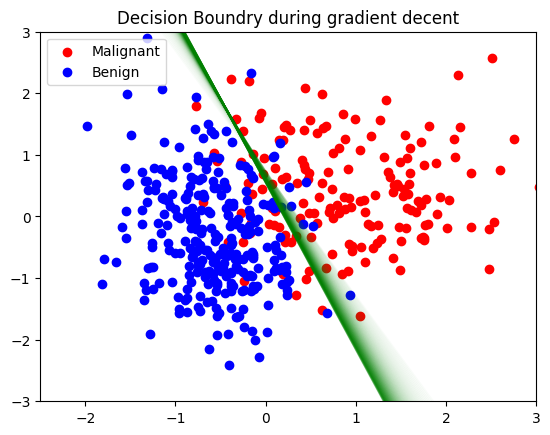

In [25]:
def plot_decision_boundry(w, X, y, step, total_step):
    x_value = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])
    if w[1] != 0:
        y_values = -(w[0] * x_value + w[2]) / w[1]
        plt.plot(x_value, y_values, color = 'green', alpha = (0.02 + (step/total_step) * 0.2))
    else:
        plt.axvline(x=-w[2]/w[0], color='green')
    plt.legend()

def plot_decision_boundaries(weights_history, X, y, total_step):
    plt.Figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', label = "Malignant")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', label = "Benign")
    plt.xlim(-2.5, 3)
    plt.ylim(-3, 3)
    for i, w in enumerate(weights_history):
        step = i * 10
        plot_decision_boundry(w, X, y, step, total_step)
    plt.title('Decision Boundry during gradient decent')
    plt.show()

plot_decision_boundaries(weights_history, X_train[:, :2], y_train, n_steps)

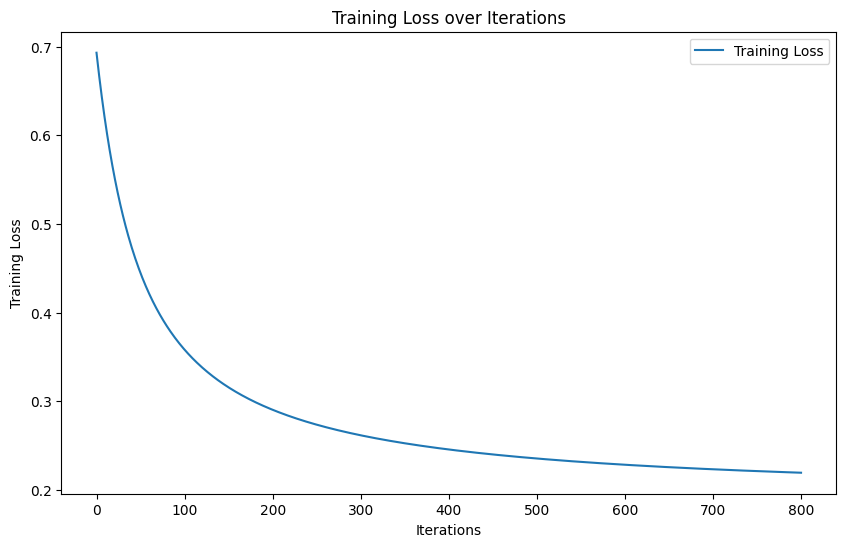

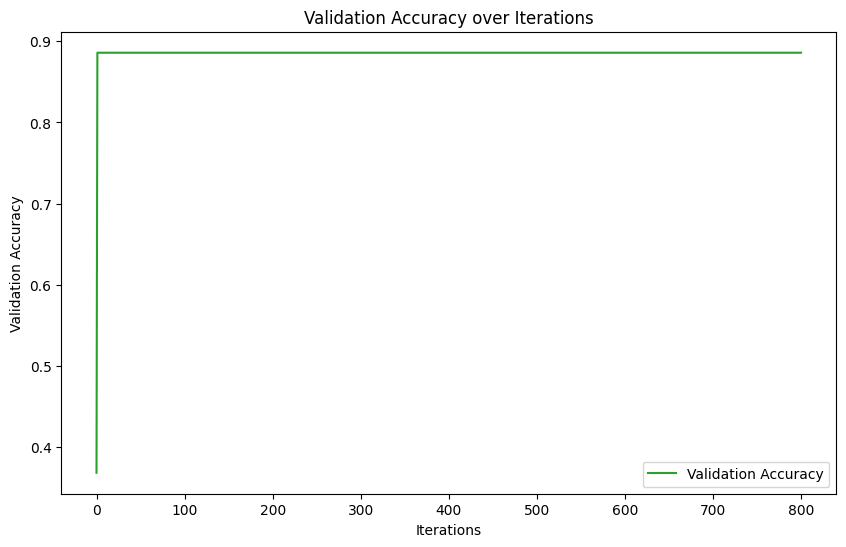

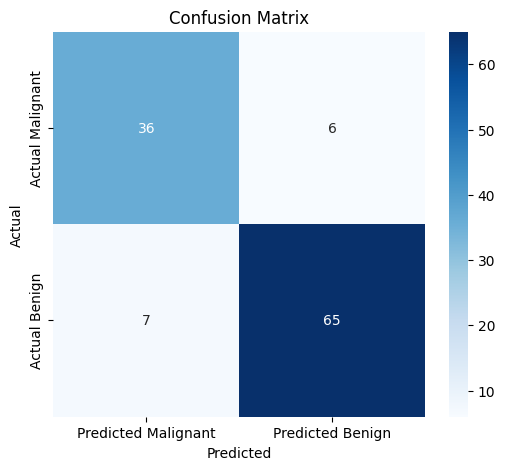

In [30]:
import seaborn as sns
def plot_training_loss(loss_history):
    epochs = range(len(loss_history))
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_history, color='tab:blue', label='Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Training Loss')
    plt.title('Training Loss over Iterations')
    plt.legend()
    plt.show()

def plot_validation_accuracy(val_accuracy_history):
    epochs = range(len(val_accuracy_history))
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, val_accuracy_history, color='tab:green', label='Validation Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy over Iterations')
    plt.legend()
    plt.show()


def plot_confusion_matrix_cm(w, X_val, y_val):
    probabilities = sigmoid(X_val @ w)
    predictions = (probabilities > 0.5).astype(int)

    cm = confusion_matrix(y_val, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Malignant', 'Predicted Benign'],
                yticklabels=['Actual Malignant', 'Actual Benign'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

plot_training_loss(loss_history)
plot_validation_accuracy(val_accuracy_history)
plot_confusion_matrix_cm(w_opt, X_val, y_val)